### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

%matplotlib inline

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {    border: 1px  black solid !important;  color: black !important;
}
</style>

In [3]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("labels.csv")

In [6]:
df.head()

filepath  xmin  xmax  ymin  ymax
0    ./images\N1.xml  1093  1396   645   727
1  ./images\N100.xml   134   301   312   350
2  ./images\N101.xml    31   139   128   161
3  ./images\N102.xml   164   316   216   243
4  ./images\N103.xml   813  1067   665   724

In [7]:
df.shape

(225, 5)

In [8]:
import xml.etree.ElementTree as xet

In [10]:
filename = df["filepath"][0]

In [11]:
filename

'./images\\N1.xml'

In [13]:
def getFilename(filename):
    
    filename_image = xet.parse(filename).getroot().find('filename').text
    
    filepath_image = os.path.join('./images',filename_image)
    
    return filepath_image

In [14]:
getFilename(filename)

'./images\\N1.jpeg'

In [15]:
df.head()

filepath  xmin  xmax  ymin  ymax
0    ./images\N1.xml  1093  1396   645   727
1  ./images\N100.xml   134   301   312   350
2  ./images\N101.xml    31   139   128   161
3  ./images\N102.xml   164   316   216   243
4  ./images\N103.xml   813  1067   665   724

In [16]:
df['filepath'] = df['filepath'].apply(getFilename) 

In [17]:
df.head()

filepath  xmin  xmax  ymin  ymax
0    ./images\N1.jpeg  1093  1396   645   727
1  ./images\N100.jpeg   134   301   312   350
2  ./images\N101.jpeg    31   139   128   161
3  ./images\N102.jpeg   164   316   216   243
4  ./images\N103.jpeg   813  1067   665   724

In [18]:
image_path = list(df["filepath"])

In [19]:
image_path

['./images\\N1.jpeg',
 './images\\N100.jpeg',
 './images\\N101.jpeg',
 './images\\N102.jpeg',
 './images\\N103.jpeg',
 './images\\N104.jpeg',
 './images\\N105.jpeg',
 './images\\N106.jpeg',
 './images\\N107.jpeg',
 './images\\N108.jpeg',
 './images\\N109.jpeg',
 './images\\N11.jpeg',
 './images\\N110.jpeg',
 './images\\N111.jpeg',
 './images\\N112.jpeg',
 './images\\N113.jpeg',
 './images\\N114.jpeg',
 './images\\N116.jpeg',
 './images\\N117.jpeg',
 './images\\N118.jpeg',
 './images\\N119.jpeg',
 './images\\N12.jpeg',
 './images\\N120.jpeg',
 './images\\N121.jpeg',
 './images\\N122.jpeg',
 './images\\N123.jpeg',
 './images\\N124.jpeg',
 './images\\N126.jpeg',
 './images\\N127.jpeg',
 './images\\N128.jpeg',
 './images\\N129.jpeg',
 './images\\N130.jpeg',
 './images\\N131.jpeg',
 './images\\N132.jpeg',
 './images\\N133.jpeg',
 './images\\N134.jpeg',
 './images\\N135.jpeg',
 './images\\N136.jpeg',
 './images\\N137.jpeg',
 './images\\N138.jpeg',
 './images\\N139.jpeg',
 './images\\N14.jpeg

### Verify Labeled data

In [21]:
file_path = image_path[0]

In [22]:
file_path

'./images\\N1.jpeg'

In [23]:
# To read the image from path
img = cv2.imread(file_path)

# Resizeable window
cv2.namedWindow("example",cv2.WINDOW_NORMAL)

# To display the image
cv2.imshow("example",img)

# Waiting key
cv2.waitKey(0)

# To close the window
cv2.destroyAllWindows()

In [24]:
# cordinates of the image 1093 1396 645 727

In [25]:
# for reagion of interest Rectangle

cv2.rectangle(img,(1093,645),(1396,727),(0,255,0),3)

cv2.namedWindow("example",cv2.WINDOW_NORMAL)

cv2.imshow("example",img)

cv2.waitKey(0)

cv2.destroyAllWindows()

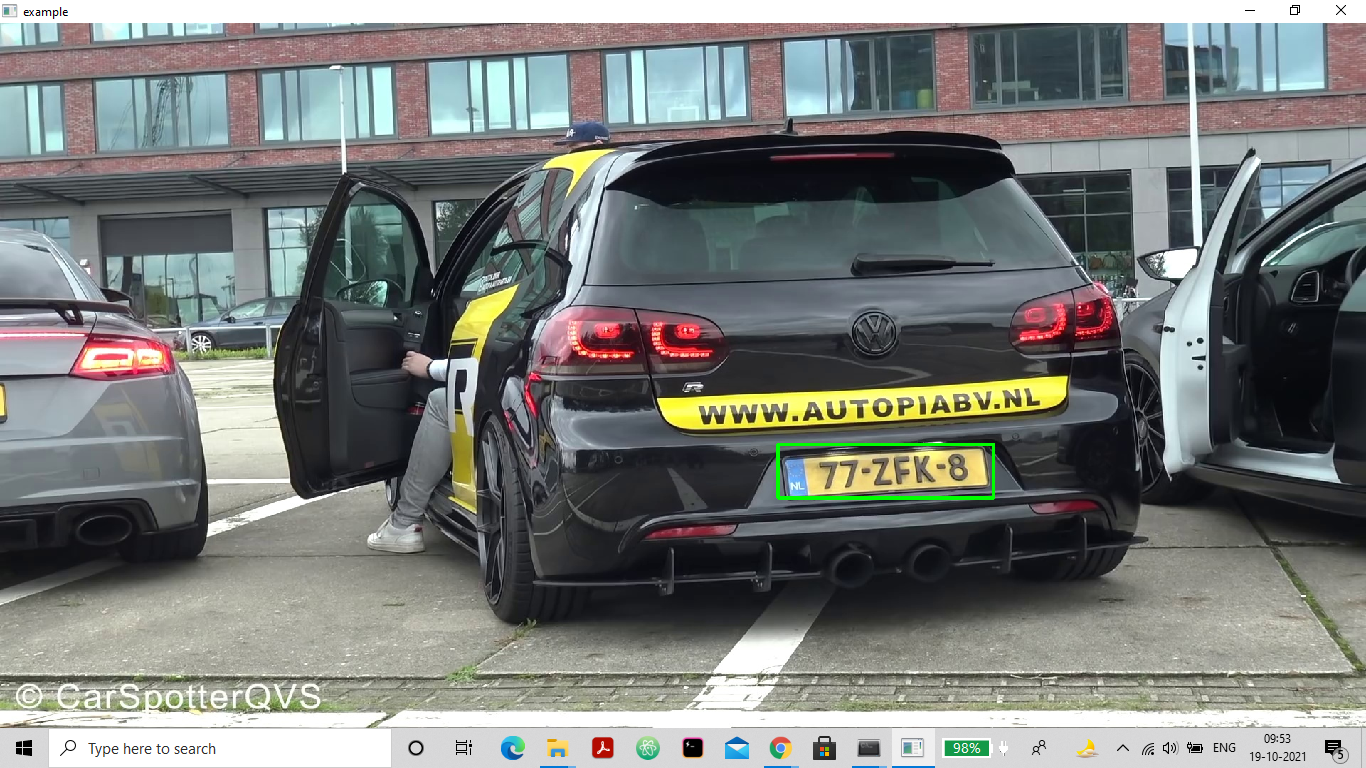

### Data Preprocessing

In [27]:
# Train Test Split

from sklearn.model_selection import train_test_split

In [28]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [29]:
df.head()

filepath  xmin  xmax  ymin  ymax
0    ./images\N1.jpeg  1093  1396   645   727
1  ./images\N100.jpeg   134   301   312   350
2  ./images\N101.jpeg    31   139   128   161
3  ./images\N102.jpeg   164   316   216   243
4  ./images\N103.jpeg   813  1067   665   724

In [31]:
labels = df[['xmin', 'xmax', 'ymin', 'ymax']]

In [32]:
labels.head()

xmin  xmax  ymin  ymax
0  1093  1396   645   727
1   134   301   312   350
2    31   139   128   161
3   164   316   216   243
4   813  1067   665   724

In [33]:
labels = labels.values

In [34]:
labels

array([[1093, 1396,  645,  727],
       [ 134,  301,  312,  350],
       [  31,  139,  128,  161],
       [ 164,  316,  216,  243],
       [ 813, 1067,  665,  724],
       [  66,  154,  166,  197],
       [ 360,  434,  174,  195],
       [ 137,  262,  249,  290],
       [ 207,  356,  174,  287],
       [ 184,  342,  220,  257],
       [ 148,  239,  250,  320],
       [ 131,  187,  130,  144],
       [ 183,  249,  211,  227],
       [  80,  239,  364,  402],
       [ 179,  347,  256,  290],
       [  39,  108,  129,  157],
       [  15,  200,   33,  126],
       [ 157,  316,  226,  278],
       [ 120,  249,  161,  202],
       [ 532,  852,  636,  706],
       [ 180,  559,  216,  314],
       [ 976, 1284,  669,  754],
       [ 647,  736,  332,  387],
       [ 311,  506,  324,  370],
       [ 342,  494,  243,  288],
       [  11,  246,   78,  165],
       [ 165,  328,  276,  324],
       [ 149,  399,  269,  327],
       [  24,  142,  209,  245],
       [  58,  221,  198,  271],
       [ 3

In [40]:
data =[]

output = []

for ind in range(len(image_path)):
    
    image = image_path[ind]

    img_arr = cv2.imread(image)

    h,w,d = img_arr.shape

    # Loading image
    # size (224,224) is stable and most widely used size

    load_image = load_img(image,target_size=(224,224))

    load_image_arry = img_to_array(load_image)

    nor_load_img_arry = load_image_arry/255.0 # Normalization Input

    # Normalization 

    xmin,xmax,ymin,ymax = labels[ind]

    nxmin,nxmax = xmin/w,xmax/w

    nymin,nymax = ymin/h,ymax/h

    labels_normal = (nxmin,nxmax,nymin,nymax) # normalized output
    
    # appending
    
    data.append(nor_load_img_arry)
    
    output.append(labels_normal)

In [41]:
data

[array([[[0.8352941 , 0.9764706 , 0.96862745],
         [0.8392157 , 1.        , 0.99607843],
         [0.8392157 , 1.        , 0.99607843],
         ...,
         [0.5764706 , 0.44313726, 0.4392157 ],
         [0.57254905, 0.4509804 , 0.44313726],
         [0.64705884, 0.5254902 , 0.5176471 ]],
 
        [[0.9137255 , 1.        , 1.        ],
         [0.88235295, 1.        , 1.        ],
         [0.87058824, 0.99607843, 0.99215686],
         ...,
         [0.5921569 , 0.4392157 , 0.44313726],
         [0.52156866, 0.3882353 , 0.39215687],
         [0.54901963, 0.41568628, 0.41960785]],
 
        [[0.89411765, 0.99215686, 0.9764706 ],
         [0.8980392 , 1.        , 0.99607843],
         [0.88235295, 1.        , 1.        ],
         ...,
         [0.5529412 , 0.39607844, 0.4       ],
         [0.5647059 , 0.4117647 , 0.42352942],
         [0.5411765 , 0.4       , 0.40784314]],
 
        ...,
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 0.99215

In [42]:
output

[(0.5692708333333333,
  0.7270833333333333,
  0.5972222222222222,
  0.6731481481481482),
 (0.29777777777777775,
  0.6688888888888889,
  0.7482014388489209,
  0.8393285371702638),
 (0.12449799196787148,
  0.5582329317269076,
  0.5355648535564853,
  0.6736401673640168),
 (0.34309623430962344,
  0.6610878661087866,
  0.5468354430379747,
  0.6151898734177215),
 (0.45166666666666666,
  0.5927777777777777,
  0.5541666666666667,
  0.6033333333333334),
 (0.17506631299734748,
  0.40848806366047746,
  0.680327868852459,
  0.8073770491803278),
 (0.72, 0.868, 0.6020761245674741, 0.6747404844290658),
 (0.22459016393442624,
  0.42950819672131146,
  0.51340206185567,
  0.5979381443298969),
 (0.46938775510204084,
  0.8072562358276644,
  0.4793388429752066,
  0.790633608815427),
 (0.38016528925619836,
  0.7066115702479339,
  0.4824561403508772,
  0.5635964912280702),
 (0.2690909090909091,
  0.43454545454545457,
  0.4681647940074906,
  0.599250936329588),
 (0.4763636363636364, 0.68, 0.7103825136612022, 

### Train Test Split

In [43]:
X = np.array(data,dtype=np.float32)

y = np.array(output,dtype=np.float32)

In [45]:
X.shape

(225, 224, 224, 3)

In [46]:
y.shape

(225, 4)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [48]:
X_train.shape

(180, 224, 224, 3)

In [49]:
X_test.shape

(45, 224, 224, 3)

In [50]:
y_train.shape

(180, 4)

In [51]:
y_test.shape

(45, 4)

### Deep Learning Model

In [52]:
# These 3 models are very powerful for object detection

from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2

from tensorflow.keras.layers import Dense,Dropout,Flatten,Input

from tensorflow.keras.models import Model

import tensorflow as tf

In [53]:
# Using InceptionResNetV2 model

In [54]:
inception_resnet = InceptionResNetV2(weights="imagenet",include_top=False,
                                    input_tensor=Input(shape=(224,224,3)))

219070464/219055592 [==============================] - 36s 0us/step


In [55]:
inception_resnet.trainable = False

In [56]:
headmodel = inception_resnet.output

headmodel = Flatten()(headmodel)

headmodel = Dense(500,activation="relu")(headmodel)

headmodel = Dense(250,activation="relu")(headmodel)

headmodel = Dense(4,activation="sigmoid")(headmodel)

# Model

model = Model(inputs=inception_resnet.input,outputs=headmodel)

In [57]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

activation_190 (Activation)     (None, 5, 5, 256)    0           batch_normalization_190[0][0]    
__________________________________________________________________________________________________
block8_7_mixed (Concatenate)    (None, 5, 5, 448)    0           activation_187[0][0]             
                                                                 activation_190[0][0]             
__________________________________________________________________________________________________
block8_7_conv (Conv2D)          (None, 5, 5, 2080)   933920      block8_7_mixed[0][0]             
__________________________________________________________________________________________________
block8_7 (Lambda)               (None, 5, 5, 2080)   0           block8_6_ac[0][0]                
                                                                 block8_7_conv[0][0]              
__________________________________________________________________________________________________
block8_7_a

In [58]:
# Compiling the model

model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))

In [59]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

batch_normalization_181 (BatchN (None, 5, 5, 224)    672         conv2d_181[0][0]                 
__________________________________________________________________________________________________
activation_181 (Activation)     (None, 5, 5, 224)    0           batch_normalization_181[0][0]    
__________________________________________________________________________________________________
conv2d_179 (Conv2D)             (None, 5, 5, 192)    399360      block8_4_ac[0][0]                
__________________________________________________________________________________________________
conv2d_182 (Conv2D)             (None, 5, 5, 256)    172032      activation_181[0][0]             
__________________________________________________________________________________________________
batch_normalization_179 (BatchN (None, 5, 5, 192)    576         conv2d_179[0][0]                 
__________________________________________________________________________________________________
batch_norm

### Training the model

In [60]:
from tensorflow.keras.callbacks import TensorBoard

In [61]:
tfb = TensorBoard("object_detection")

In [62]:
history = model.fit(X_train,y_train,batch_size=10,epochs=100,
                    validation_data=(X_test,y_test),callbacks=[tfb])

Epoch 1/100
18/18 [==============================] - 54s 2s/step - loss: 0.1054 - val_loss: 0.0962
Epoch 2/100
18/18 [==============================] - 35s 2s/step - loss: 0.0989 - val_loss: 0.0997
Epoch 3/100
18/18 [==============================] - 34s 2s/step - loss: 0.0981 - val_loss: 0.0819
Epoch 4/100
18/18 [==============================] - 33s 2s/step - loss: 0.0879 - val_loss: 0.0821
Epoch 5/100
18/18 [==============================] - 33s 2s/step - loss: 0.0843 - val_loss: 0.0704
Epoch 6/100
18/18 [==============================] - 33s 2s/step - loss: 0.0787 - val_loss: 0.0740
Epoch 7/100
18/18 [==============================] - 33s 2s/step - loss: 0.0783 - val_loss: 0.0692
Epoch 8/100
18/18 [==============================] - 34s 2s/step - loss: 0.0803 - val_loss: 0.0720
Epoch 9/100
18/18 [==============================] - 36s 2s/step - loss: 0.0786 - val_loss: 0.0724
Epoch 10/100
18/18 [==============================] - 41s 2s/step - loss: 0.0813 - val_loss: 0.0736
Epoch 11/

18/18 [==============================] - 34s 2s/step - loss: 0.0592 - val_loss: 0.0485
Epoch 84/100
18/18 [==============================] - 34s 2s/step - loss: 0.0604 - val_loss: 0.0417
Epoch 85/100
18/18 [==============================] - 33s 2s/step - loss: 0.0533 - val_loss: 0.0369
Epoch 86/100
18/18 [==============================] - 35s 2s/step - loss: 0.0494 - val_loss: 0.0396
Epoch 87/100
18/18 [==============================] - 34s 2s/step - loss: 0.0455 - val_loss: 0.0379
Epoch 88/100
18/18 [==============================] - 34s 2s/step - loss: 0.0434 - val_loss: 0.0358
Epoch 89/100
18/18 [==============================] - 34s 2s/step - loss: 0.0415 - val_loss: 0.0334
Epoch 90/100
18/18 [==============================] - 34s 2s/step - loss: 0.0213 - val_loss: 0.0190
Epoch 91/100
18/18 [==============================] - 34s 2s/step - loss: 0.0093 - val_loss: 0.0088
Epoch 92/100
18/18 [==============================] - 34s 2s/step - loss: 0.0062 - val_loss: 0.0083
Epoch 93/100


In [64]:
history = model.fit(X_train,y_train,batch_size=10,epochs=200,
                    validation_data=(X_test,y_test),callbacks=[tfb],initial_epoch=100)

Epoch 101/200
18/18 [==============================] - 42s 2s/step - loss: 4.5702e-04 - val_loss: 0.0059
Epoch 102/200
18/18 [==============================] - 37s 2s/step - loss: 3.7345e-04 - val_loss: 0.0062
Epoch 103/200
18/18 [==============================] - 36s 2s/step - loss: 2.6649e-04 - val_loss: 0.0062
Epoch 104/200
18/18 [==============================] - 36s 2s/step - loss: 3.0605e-04 - val_loss: 0.0063
Epoch 105/200
18/18 [==============================] - 36s 2s/step - loss: 3.3620e-04 - val_loss: 0.0068
Epoch 106/200
18/18 [==============================] - 36s 2s/step - loss: 3.4252e-04 - val_loss: 0.0066
Epoch 107/200
18/18 [==============================] - 36s 2s/step - loss: 4.3757e-04 - val_loss: 0.0063
Epoch 108/200
18/18 [==============================] - 35s 2s/step - loss: 2.9711e-04 - val_loss: 0.0062
Epoch 109/200
18/18 [==============================] - 36s 2s/step - loss: 3.5618e-04 - val_loss: 0.0065
Epoch 110/200
18/18 [==============================] - 

18/18 [==============================] - 36s 2s/step - loss: 4.0761e-04 - val_loss: 0.0068
Epoch 180/200
18/18 [==============================] - 36s 2s/step - loss: 4.3815e-04 - val_loss: 0.0061
Epoch 181/200
18/18 [==============================] - 37s 2s/step - loss: 5.4403e-04 - val_loss: 0.0066
Epoch 182/200
18/18 [==============================] - 36s 2s/step - loss: 3.6182e-04 - val_loss: 0.0061
Epoch 183/200
18/18 [==============================] - 35s 2s/step - loss: 2.3367e-04 - val_loss: 0.0062
Epoch 184/200
18/18 [==============================] - 38s 2s/step - loss: 2.1370e-04 - val_loss: 0.0062
Epoch 185/200
18/18 [==============================] - 36s 2s/step - loss: 1.5866e-04 - val_loss: 0.0064
Epoch 186/200
18/18 [==============================] - 36s 2s/step - loss: 1.3288e-04 - val_loss: 0.0064
Epoch 187/200
18/18 [==============================] - 36s 2s/step - loss: 1.3981e-04 - val_loss: 0.0060
Epoch 188/200
18/18 [==============================] - 36s 2s/step - 

### Saving the model

In [65]:
model.save("./models/object_det.h5")

### Make Predictions

In [67]:
## Load Model

model = tf.keras.models.load_model("./models/object_det.h5")
print("Model Loaded successfully")

Model Loaded successfully


In [76]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [78]:
path = "./test_images/N207.jpeg"

image = load_img(path)

In [79]:
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)

In [80]:
image_1 = load_img(path,target_size=(224,224))

img_arr_224 = img_to_array(image_1)/255.0 # Normalization

In [82]:
# Print size of the original image

h,w,d = image.shape
print("The height of the image is",h)
print("The weight of the image is",w)
print("The dimensions of the image is",d)

The height of the image is 423
The weight of the image is 541
The dimensions of the image is 3


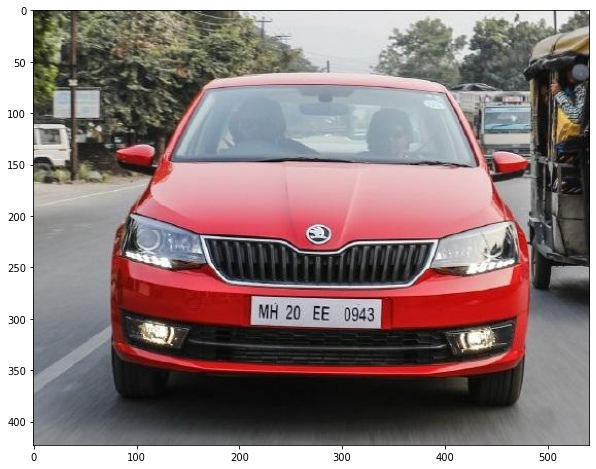

In [84]:
plt.figure(figsize=(10,8))
plt.imshow(image)

In [85]:
img_arr_224.shape

(224, 224, 3)

In [86]:
# Reshaping the image 

test_arr = img_arr_224.reshape(1,224,224,3)

test_arr.shape

(1, 224, 224, 3)

In [87]:
cordinates = model.predict(test_arr)

In [88]:
cordinates

array([[0.4311645, 0.6784133, 0.6592798, 0.7252566]], dtype=float32)

In [89]:
# Denormalizing the cordinates

In [90]:
denorm = np.array([w,w,h,h])

cordinates = cordinates * denorm

In [91]:
cordinates

array([[233.25999618, 367.0215801 , 278.87536526, 306.78355104]])

In [92]:
cordinates = cordinates.astype(np.int32)

In [93]:
cordinates

array([[233, 367, 278, 306]])

In [94]:
### Bounding Box

In [98]:
xmin,xmax,ymin,ymax = cordinates[0]

In [100]:
plt1 = (xmin,ymin)

plt2 = (xmax,ymax)

In [101]:
print(plt1,plt2)

(233, 278) (367, 306)


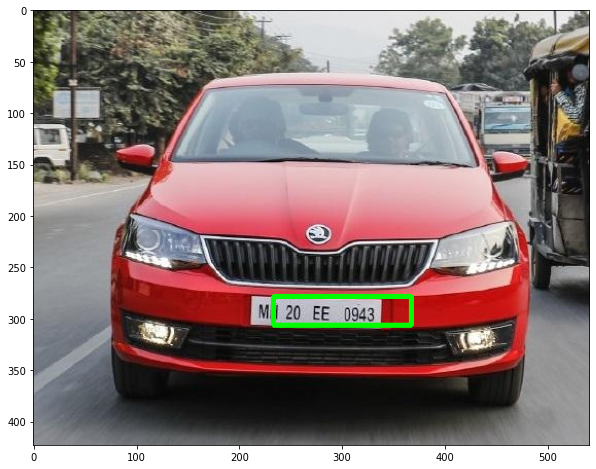

In [104]:
cv2.rectangle(image,plt1,plt2,(0,255,0),3)

plt.figure(figsize=(12,8))

plt.imshow(image)

### Create Pipeline

In [145]:
def num_plate(path):
    
    image = load_img(path)

    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)

    image_1 = load_img(path,target_size=(224,224))

    img_arr_224 = img_to_array(image_1)/255.0 # Normalization

    h,w,d = image.shape

    # Reshaping the image 

    test_arr = img_arr_224.reshape(1,224,224,3)

    cordinates = model.predict(test_arr)
    
    denorm = np.array([w,w,h,h])

    cordinates = cordinates * denorm
    
    cordinates = cordinates.astype(np.int32)
    
    xmin,xmax,ymin,ymax = cordinates[0]

    plt1 = (xmin,ymin)

    plt2 = (xmax,ymax)
    
    print(plt1,plt2)

    cv2.rectangle(image,plt1,plt2,(0,255,0),3)
    
    return image,cordinates

(351, 982) (625, 1016)


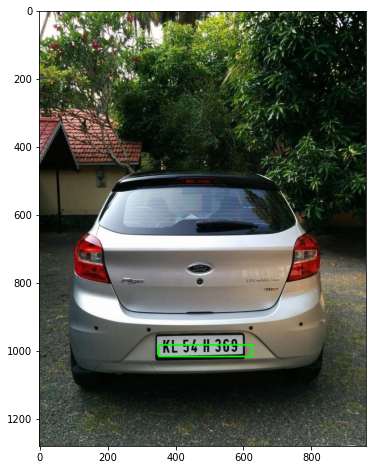

In [146]:
path = "./test_images/N139.jpeg"

image,cordinates = num_plate(path)

plt.figure(figsize=(12,8))

plt.imshow(image)

plt.show()

(839, 661) (1090, 731)


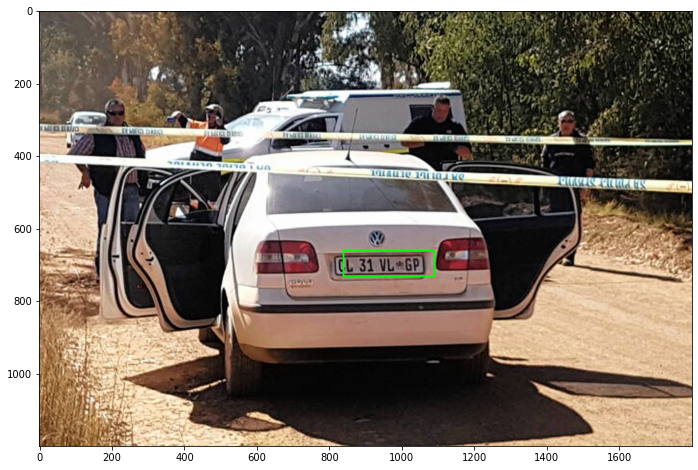

In [147]:
path = "./test_images/N103.jpeg"

image,cordinates = num_plate(path)

plt.figure(figsize=(12,8))

plt.imshow(image)

plt.show()

(441, 460) (628, 491)


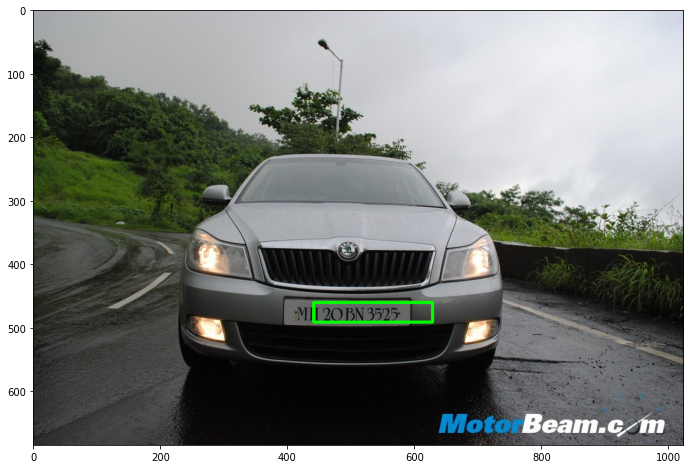

In [148]:
path = "./test_images/N137.jpeg"

image,cordinates = num_plate(path)

plt.figure(figsize=(12,8))

plt.imshow(image)

plt.show()

In [149]:
#C:\Users\charl\AppData\Local\Tesseract-OCR

(233, 278) (367, 306)


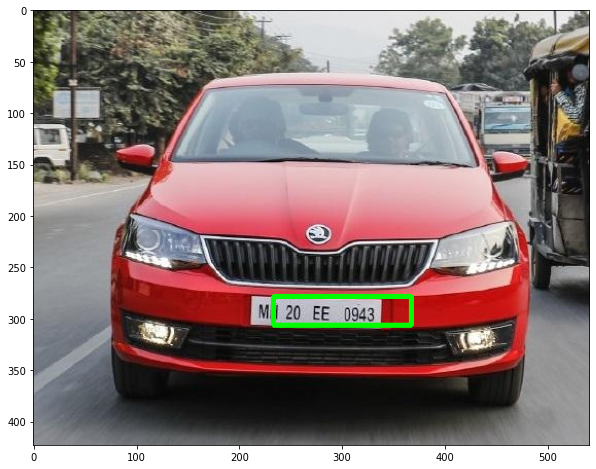

In [150]:
path = "./test_images/N207.jpeg"

image,cordinates = num_plate(path)

plt.figure(figsize=(12,8))

plt.imshow(image)

plt.show()

### Optical Character Recognation

In [178]:
import pytesseract as pt

In [179]:
path = "./test_images/N207.jpeg"

img = np.array(load_img(path))

In [180]:
# ROI
xmin, xmax, ymin, ymax = [218,336,284,311]

roi = img[ymin:ymax,xmin:xmax]

In [181]:
roi

array([[[195, 202, 212],
        [180, 187, 197],
        [204, 211, 219],
        ...,
        [205, 200, 206],
        [204, 199, 206],
        [207, 196, 200]],

       [[192, 196, 207],
        [188, 195, 203],
        [189, 196, 202],
        ...,
        [201, 200, 206],
        [202, 201, 207],
        [205, 200, 204]],

       [[196, 199, 208],
        [188, 192, 201],
        [117, 122, 126],
        ...,
        [199, 198, 204],
        [197, 196, 202],
        [199, 194, 198]],

       ...,

       [[ 45,  23,  25],
        [ 49,  23,  26],
        [ 54,  22,  27],
        ...,
        [191, 180, 184],
        [191, 178, 185],
        [200, 175, 181]],

       [[ 35,  13,  15],
        [ 38,  13,  16],
        [ 42,  13,  15],
        ...,
        [134, 122, 124],
        [139, 127, 131],
        [150, 128, 131]],

       [[ 31,  13,  11],
        [ 33,  13,  12],
        [ 34,  13,  12],
        ...,
        [ 26,  12,  12],
        [ 21,   6,   9],
        [ 22,   3,   5]]

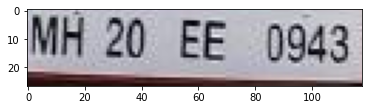

In [182]:
plt.imshow(roi)

plt.show()

In [183]:
# Extract Text fom image

In [184]:
roi

array([[[195, 202, 212],
        [180, 187, 197],
        [204, 211, 219],
        ...,
        [205, 200, 206],
        [204, 199, 206],
        [207, 196, 200]],

       [[192, 196, 207],
        [188, 195, 203],
        [189, 196, 202],
        ...,
        [201, 200, 206],
        [202, 201, 207],
        [205, 200, 204]],

       [[196, 199, 208],
        [188, 192, 201],
        [117, 122, 126],
        ...,
        [199, 198, 204],
        [197, 196, 202],
        [199, 194, 198]],

       ...,

       [[ 45,  23,  25],
        [ 49,  23,  26],
        [ 54,  22,  27],
        ...,
        [191, 180, 184],
        [191, 178, 185],
        [200, 175, 181]],

       [[ 35,  13,  15],
        [ 38,  13,  16],
        [ 42,  13,  15],
        ...,
        [134, 122, 124],
        [139, 127, 131],
        [150, 128, 131]],

       [[ 31,  13,  11],
        [ 33,  13,  12],
        [ 34,  13,  12],
        ...,
        [ 26,  12,  12],
        [ 21,   6,   9],
        [ 22,   3,   5]]

In [185]:
import pytesseract

In [188]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\charl\AppData\Local\Tesseract-OCR\tesseract.exe'

In [190]:
text = pytesseract.image_to_string(roi)

In [191]:
print(text)

MN 20 EE D943


